In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
titanic_df.shape

(891, 12)

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 결측치 파악

In [4]:
titanic_df['Age'].isnull().sum()

177

In [5]:
titanic_df['Cabin'].isnull().sum()

687

In [6]:
titanic_df['Embarked'].isnull().sum()

2

# 결측치 처리
#### Age : 평균나이
#### 나머지 : 'N'으로 변경

In [7]:
titanic_df['Age'].fillna(titanic_df['Age'].mean,inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 문자열 변수(피처) 빈도 분포 확인 : value_counts()

In [8]:
print('Sex분포:',titanic_df['Sex'].value_counts())
print('Sex분포:',titanic_df['Cabin'].value_counts())
print('Sex분포:',titanic_df['Embarked'].value_counts())

Sex분포: male      577
female    314
Name: Sex, dtype: int64
Sex분포: N              687
B96 B98          4
C23 C25 C27      4
G6               4
E101             3
              ... 
E17              1
C148             1
C46              1
D7               1
D6               1
Name: Cabin, Length: 148, dtype: int64
Sex분포: S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [9]:
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [10]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

# 성별에 따른 생존자수 분포(EDA)

In [11]:
titanic_df.groupby('Sex')['Sex'].count()
#성별 분포 확인
# () 안에는 나타내고 싶은 값. [] 안에는 기준이 되는 값.

Sex
female    314
male      577
Name: Sex, dtype: int64

In [12]:
titanic_df.groupby('Survived')['Survived'].count()
#생존 분포 확인        #사망:0 생존:1

Survived
0    549
1    342
Name: Survived, dtype: int64

In [13]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
#성별에 따른 생존 확인

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

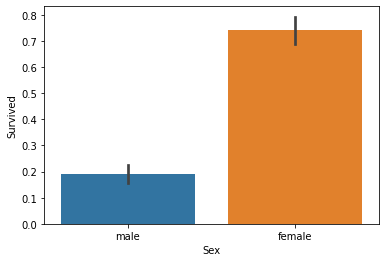

In [14]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

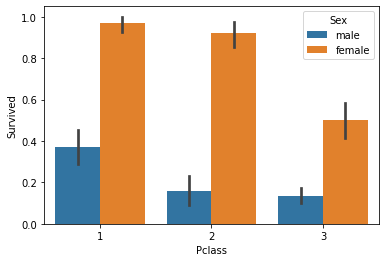

In [15]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

# 데이터 전처리 : 구간화(binning)

### 연령대에 따른 생존자수 분호
#### 연령은 수치형 변수이므로 범주형으로 구간화(binning)

In [16]:
def get_category(age):
    cat=''
    age=int(age)
    print(age)
    if age <=-1 : cat ='Unknown'
    elif age<=5 : cat ='Baby'
    elif age<=12 : cat ='Child'
    elif age<=18 : cat ='Teenager'
    elif age<=25 : cat ='Student'
    elif age<=35 : cat ='Young Adult'
    elif age<=60 : cat ='Adult'
    else: cat = 'Elderly'
    return cat

In [17]:
# group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
# plt.figure(figsize=(10,6))
# titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
# sns.barplot(x='Age_cat',y='Survived', hue='Sex',data= titanic_df, order=group_names)
# titanic_df.drop(columns=['Age_cat'],inplace=True)

In [18]:
# # 막대그래프의 크기 figure를 더 크게 설정 
# plt.figure(figsize=(10,6))

# #X축의 값을 순차적으로 표시하기 위한 설정 
# group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# # lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# # get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
# titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
# sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
# titanic_df.drop('Age_cat', axis=1, inplace=True)

# 데이터 전처리 : 인코딩
### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

###### 인코딩 : 사이킷런의 LabelEncoder 클래스 이용해서 세이블 인코딩 적용
###### 0~(카고리 유형수-1) 숫자 값으로 변환
###### fit() / transform() 매서드 사용

In [19]:
from sklearn import preprocessing

#레이블 인코딩 함수
def encode_features(dataDF):
    #문자열 카테고리 피처
    features=['Cabin','Sex','Embarked']
    for feature in features :
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


# 데이터 전처리 : 삭제

In [20]:
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


# 종합

In [21]:
from sklearn.preprocessing import LabelEncoder

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna('N',inplace=True)
    return df

In [22]:
#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

In [23]:
#레이블 인코딩 수행
def format_features(df):
    #문자열 카테고리 피처
    df['Cabin']=df['Cabin'].str[:1] #첫 문자만 추출
    features=['Cabin','Sex','Embarked']
    for feature in features :
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

In [24]:
#앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

 # 모델별 성능을 테스트하기

In [25]:
titanic_df=pd.read_csv('titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

In [26]:
X_titanic_df=transform_features(X_titanic_df)
X_titanic_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리,랜덤포레스트,로지스틱회귀를 위한 estimator객체 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

#결정트리 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('결정트리의 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

#랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('랜덤포레스트의 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('로지스틱회귀의 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

결정트리의 정확도: 0.7877
랜덤포레스트의 정확도: 0.8547
로지스틱회귀의 정확도: 0.8492


C:\Users\admin\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

def exec_kfold(clf,folds=5):
    kfold=KFold(n_splits=folds)
    scores=[]
    
    
    for iter_n,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
            
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        accuracy=accuracy_score(y_test,pred)
        scores.append(accuracy)
        print('교차검증 %d : %f' % (iter_n,accuracy))
            
    mean_accuracy=np.mean(scores)
    print('평균 정확도 : %f' % mean_accuracy)
    
exec_kfold(dt_clf,folds=5)

교차검증 0 : 0.754190
교차검증 1 : 0.780899
교차검증 2 : 0.786517
교차검증 3 : 0.769663
교차검증 4 : 0.820225
평균 정확도 : 0.782299


In [30]:
# from sklearn.model_selection import KFold
# kfold=KFold(n_splits=5)
# for train_index,test_index in kfold.split(X_titanic_df):
#     print(train_index,test_index)

In [31]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_n, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도:{1:.4f}'.format(iter_n,accuracy))
print('평균 정확도:{0: .4f}'.format(np.mean(scores)))

교차 검증 0 정확도:0.7430
교차 검증 1 정확도:0.7753
교차 검증 2 정확도:0.7921
교차 검증 3 정확도:0.7865
교차 검증 4 정확도:0.8427
평균 정확도: 0.7879


In [32]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
            'min_samples_split':[2,3,5],
            'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : ',grid_dclf.best_score_)
best_dclf=grid_dclf.best_estimator_

dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :  0.7991825076332119
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


# BaseEstimator

In [33]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    def predict(self,X):
        pred=np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else :
                pred[i]=1
        return pred

In [34]:
from sklearn.preprocessing import LabelEncoder

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna('N',inplace=True)
    return df

In [35]:
#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

In [36]:
#레이블 인코딩 수행
def format_features(df):
    #문자열 카테고리 피처
    df['Cabin']=df['Cabin'].str[:1] #첫 문자만 추출
    features=['Cabin','Sex','Embarked']
    for feature in features :
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

In [37]:
#앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df=pd.read_csv('titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

myclf=MyDummyClassifier()
myclf.fit(X_train,y_train)
mypred=myclf.predict(X_test)
print('MyDummyClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,mypred)))

MyDummyClassifier 정확도: 0.3408


###### MyDummyClassifier 정확도는 0.3408으로 매우 떨어짐을 알 수 있다. 따라서 정확도(accuracy_score)는 만능이 아니다.

In [39]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [40]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [41]:
digits.data.shape

(1797, 64)

In [42]:
digits.target.shape

(1797,)

In [43]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [44]:
y=(digits.target==7).astype(int)
#7인 값만 알고 싶으므로 7을 test값으로 취한다.

In [45]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=11)  #default=0.25

In [46]:
X_train

array([[ 0.,  0.,  3., ..., 12., 14.,  7.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 16., 13.,  1.],
       [ 0.,  1., 11., ..., 13., 16.,  5.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [47]:
X_test

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 15.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

In [48]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
print('y_test.shape : ' , y_test.shape)
pd.Series(y_test).value_counts()

y_test.shape :  (450,)


0    405
1     45
dtype: int64

In [51]:
fake_cl=MyFakeClassifier()
fake_cl.fit(X_train,y_train)
fakePred=fake_cl.predict(X_test)
accuracy=accuracy_score(y_test,fakePred)
print('정확도 : ',np.round((accuracy),3))

정확도 :  0.9


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,fakePred)
#구하고자 하는 값의 Tn,Fp
#                 Fn,Tp  을 보여준다.

array([[405,   0],
       [ 45,   0]], dtype=int64)

#
#
#### accuracy : F인 데이터=Tf+Ff / 전체 데이터=Tt+Ft+Tf+Ff
#### Precision : Tp/Tp+Fp (ex>스펨메일) :Fn 줄이기
#### Recall : Tp/Tp+Fn (ex>암진단) -실제 n을 p로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우 :Fp 줄이기

In [53]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    
digits=load_digits()
y=(digits.target==7).astype(int)
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=11)
fake_clf=MyFakeClassifier()
fake_clf.fit(X_train,y_train)
fakepred=fake_clf.predict(X_test)

In [54]:
fakepred.astype(int).sum()

0

In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('정밀도 :',precision_score(y_test,fakepred))
print('재현율 :',recall_score(y_test,fakepred))

정밀도 : 0.0
재현율 : 0.0


C:\Users\admin\anaconda3\envs\multi\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)  #오차행렬
    accuracy=accuracy_score(y_test,pred)     #정확도
    presision=precision_score(y_test,pred)   #정밀도
    recall=recall_score(y_test,pred)         #재현율
    
    print("오차행렬")
    print(confusion)
    print("정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율 : {2:.3f}".format(accuracy,presision,recall))

###### 타이타닉 데이터 사용하기

In [57]:
# 타이타닉 생존자 예측
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)
pred = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , pred)))
get_clf_eval(y_test, pred)


Dummy Classifier의 정확도는: 0.7877
오차행렬
[[92 18]
 [20 49]]
정확도: 0.788, 정밀도: 0.731, 재현율 : 0.710


In [58]:
pred_proba=lr_clf.predict_proba(X_test)
pred_proba[:10]

array([[0.85135022, 0.14864978],
       [0.88844395, 0.11155605],
       [0.91417169, 0.08582831],
       [0.05272703, 0.94727297],
       [0.35475105, 0.64524895],
       [0.45457295, 0.54542705],
       [0.08350991, 0.91649009],
       [0.07354457, 0.92645543],
       [0.37301912, 0.62698088],
       [0.32057278, 0.67942722]])

In [59]:
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)

print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측')
print(pred_proba_result)

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
[[0.85135022 0.14864978 0.        ]
 [0.88844395 0.11155605 0.        ]
 [0.91417169 0.08582831 0.        ]
 [0.05272703 0.94727297 1.        ]
 [0.35475105 0.64524895 1.        ]
 [0.45457295 0.54542705 0.        ]
 [0.08350991 0.91649009 1.        ]
 [0.07354457 0.92645543 1.        ]
 [0.37301912 0.62698088 0.        ]
 [0.32057278 0.67942722 1.        ]
 [0.90236015 0.09763985 0.        ]
 [0.27563781 0.72436219 1.        ]
 [0.87720865 0.12279135 0.        ]
 [0.12561586 0.87438414 1.        ]
 [0.03778561 0.96221439 1.        ]
 [0.274467   0.725533   1.        ]
 [0.86305088 0.13694912 0.        ]
 [0.76105657 0.23894343 0.        ]
 [0.90543343 0.09456657 0.        ]
 [0.6944047  0.3055953  0.        ]
 [0.68345397 0.31654603 0.        ]
 [0.07117964 0.92882036 1.        ]
 [0.87720943 0.12279057 0.        ]
 [0.56699856 0.43300144 0.        ]
 [0.3329554  0.6670446  1.        ]
 [0.10332294 0.89667706 1.        ]
 [0.89611721 0.10388279 0.    

In [60]:
from sklearn.preprocessing import Binarizer

X=[[0.5,-1,2],
   [2,0,0],
   [0,1.1,1.2]]

binarizer=Binarizer(threshold=1.0)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


In [61]:
from sklearn.preprocessing import Binarizer

c_threshold=0.5
pred_proba_1=pred_proba[:,1].reshape(-1,1)
bina=Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict=bina.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[92 18]
 [15 54]]
정확도: 0.816, 정밀도: 0.750, 재현율 : 0.783


In [62]:
from sklearn.preprocessing import Binarizer

custom_threshold=0.4
pred_proba_1=pred_proba[:,1].reshape(-1,1)
bina=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=bina.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[84 26]
 [13 56]]
정확도: 0.782, 정밀도: 0.683, 재현율 : 0.812


In [63]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds)
    

임곗값: 0.4
오차행렬
[[84 26]
 [13 56]]
정확도: 0.782, 정밀도: 0.683, 재현율 : 0.812
임곗값: 0.45
오차행렬
[[91 19]
 [14 55]]
정확도: 0.816, 정밀도: 0.743, 재현율 : 0.797
임곗값: 0.5
오차행렬
[[92 18]
 [15 54]]
정확도: 0.816, 정밀도: 0.750, 재현율 : 0.783
임곗값: 0.55
오차행렬
[[98 12]
 [18 51]]
정확도: 0.832, 정밀도: 0.810, 재현율 : 0.739
임곗값: 0.6
오차행렬
[[100  10]
 [ 21  48]]
정확도: 0.827, 정밀도: 0.828, 재현율 : 0.696


In [64]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('임계값 shape :',thresholds.shape)
print('정밀도 shape :',precisions.shape)
print('재현율 shape :',recalls.shape)

idx=np.arange(0,thresholds.shape[0],15)
print('sample index:',idx)
print('임계값 shape :',np.round(thresholds[idx],3))
print('정밀도 shape :',np.round(precisions[idx],3))
print('재현율 shape :',np.round(recalls[idx],3))


임계값 shape : (165,)
정밀도 shape : (166,)
재현율 shape : (166,)
sample index: [  0  15  30  45  60  75  90 105 120 135 150]
임계값 shape : [0.075 0.107 0.123 0.15  0.21  0.311 0.45  0.587 0.651 0.793 0.916]
정밀도 shape : [0.401 0.42  0.467 0.529 0.59  0.678 0.733 0.817 0.844 1.    1.   ]
재현율 shape : [1.    0.957 0.928 0.928 0.899 0.884 0.797 0.71  0.551 0.435 0.217]


In [65]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions,recalls, thresholds=precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    thresholds_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:thresholds_boundary],linestyle='--',label="precision")
    plt.plot(thresholds,recalls[0:thresholds_boundary],label="recall")
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

Using matplotlib backend: TkAgg


In [66]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7206


In [67]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[84 26]
 [13 56]]
정확도: 0.7821, 정밀도: 0.6829, 재현율: 0.8116, F1:0.7417
임곗값: 0.45
오차 행렬
[[91 19]
 [14 55]]
정확도: 0.8156, 정밀도: 0.7432, 재현율: 0.7971, F1:0.7692
임곗값: 0.5
오차 행렬
[[92 18]
 [15 54]]
정확도: 0.8156, 정밀도: 0.7500, 재현율: 0.7826, F1:0.7660
임곗값: 0.55
오차 행렬
[[98 12]
 [18 51]]
정확도: 0.8324, 정밀도: 0.8095, 재현율: 0.7391, F1:0.7727
임곗값: 0.6
오차 행렬
[[100  10]
 [ 21  48]]
정확도: 0.8268, 정밀도: 0.8276, 재현율: 0.6957, F1:0.7559


In [68]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
print('max predict_proba:', np.max(pred_proba_class1))

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
print('thresholds[0]:', thresholds[0])
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

max predict_proba: 0.9627474821831553
thresholds[0]: 1.9627474821831554
샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50 55]
샘플용 10개의 임곗값:  [1.96 0.7  0.65 0.62 0.56 0.52 0.37 0.21 0.15 0.11 0.1  0.07]
샘플 임곗값별 FPR:  [0.    0.036 0.055 0.082 0.1   0.164 0.236 0.391 0.555 0.745 0.836 0.936]
샘플 임곗값별 TPR:  [0.    0.507 0.551 0.652 0.739 0.783 0.841 0.899 0.928 0.942 0.957 1.   ]


In [69]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


In [70]:
from sklearn.metrics import roc_auc_score

### 아래는 roc_auc_score()의 인자를 잘못 입력한 것으로, 책에서 수정이 필요한 부분입니다. 
### 책에서는 roc_auc_score(y_test, pred)로 예측 타겟값을 입력하였으나 
### roc_auc_score(y_test, y_score)로 y_score는 predict_proba()로 호출된 예측 확률 ndarray중 Positive 열에 해당하는 ndarray입니다. 

#pred = lr_clf.predict(X_test)
#roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8760


In [71]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))